# Playstore Apps Analysis and Prediction Project

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

## Step 1: Understanding the Domain and Project Requirements:

- collection of applications data from playstore
- data cleaning through piplines
- analysing apps data and create insights for:
    
    *all these analysis is for specifying the perfect combination to have an application with high number of installs*
    - from the company column:
        - relationship between company and number of installs 
        - relationship between company and number of comments on the application
        - relationship between company and app rating
        - relationship between company and number of reports/ reports type    
    - from the underTitle column:
        - relationship between the title of app recommendation and the number of installs 
        - if there is a reltionship between the repetitive app appearance under multiple titles and the number of installs
    - from the gener column:
        - relationship between gener and number of installs
        - relationship between gener and number of comments
        - relationship between gener and updateing date (is a specific gener less updated than others)
        - relationship between gener and size of application
        - relationship between gener and android version
        - relationship between gener and type and number of interactive elements needed for the application development
        - relationship between gener and number of reports
        - relationship between gener and price of app_purchases
    - from the number of comments column:
        - relationship between number of comments and number of installs
        - relationship between number of comments and the existance of interactive elements
        - relationship between number of comments and the app reporting
        - relationship between number of comments and the price of in_app_purchases
    - from the size column:
        - relationship between size of app and the android version supported
        - relationship between size of app and the interactive elements in app
        - relationship between size of app and the number of comments
        - relationship between size of app and the number of installs


- create a ML predictive model for:
    - predicting the number of installs for a given unknown application
    - clustering applications according to number of installs 
    - perform dimentionality reduction to remove unnecessary features
    - anomaly detection to find hidden patterns between data

# Step 2: Data Collection:
 the data collection process was performed in the jupyter file of title "scrapping.ipynb"

In [2]:
df = pd.read_csv('firstpageApps.csv',index_col=0)
df.head()

,app_name,app_company,app_rating,underTitle,app_price,gener,noOfComments,page_index,latest_Update,size,Installs,android_Version_Supported,InterActive_Elem,content_Rating,Report,In-app_Purchases
0,YouTube,Google LLC,4.3,Recommended for you,0,Video Players & Editors,121306065,1,"August 26, 2021",Varies with device,"10,000,000,000+",Varies with device,"Users Interact, Digital Purchases",TeenLearn more,Flag as inappropriate,NaN
1,Subway Surfers,SYBO Games,4.4,Recommended for you,0,Arcade,36209360,1,"August 12, 2021",174M,"1,000,000,000+",4.4 and up,In-Game Purchases,Everyone 10+Fantasy ViolenceLearn more,Flag as inappropriate,$0.99 - $99.99 per item
2,Netflix,"Netflix, Inc.",4.3,Recommended for you,0,Entertainment,11979087,1,"August 26, 2021",Varies with device,"1,000,000,000+",Varies with device,NaN,TeenLearn more,Flag as inappropriate,$7.99 - $13.99 per item
3,Instagram,Instagram,3.8,Recommended for you,0,Social,123499183,1,"August 23, 2021",Varies with device,"1,000,000,000+",Varies with device,"Users Interact, Shares Info, Shares Location",TeenLearn more,Flag as inappropriate,$0.99 - $4.99 per item
4,My Talking Tom 2,Outfit7 Limited,4.3,Recommended for you,0,Casual,3859794,1,"August 18, 2021",126M,"100,000,000+",5.0 and up,Digital Purchases,EveryoneComic MischiefLearn more,Flag as inappropriate,$0.99 - $99.99 per item


## Step 3: Data Visualization:
### a) investigate the dataset:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 56
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   app_name                   57 non-null     object 
 1   app_company                57 non-null     object 
 2   app_rating                 57 non-null     float64
 3   underTitle                 57 non-null     object 
 4   app_price                  57 non-null     int64  
 5   gener                      57 non-null     object 
 6   noOfComments               57 non-null     int64  
 7   page_index                 57 non-null     int64  
 8   latest_Update              57 non-null     object 
 9   size                       57 non-null     object 
 10  Installs                   57 non-null     object 
 11  android_Version_Supported  57 non-null     object 
 12  InterActive_Elem           45 non-null     object 
 13  content_Rating             57 non-null     object 
 

- interactive elements contain 45 non null elements = 23 Nones
- in-app_purchases contain 36 non null elemenets = 21 Nones
**this may be due tothe existance of apps containing no interactive elements or in-app purchases

In [4]:
 df.describe()

,app_rating,app_price,noOfComments,page_index
count,57.000000,57.0,5.700000e+01,57.0
mean,4.147368,0.0,2.273440e+07,1.0
std,0.527496,0.0,3.798016e+07,0.0
min,2.300000,0.0,3.216900e+04,1.0
25%,4.100000,0.0,2.348847e+06,1.0
50%,4.300000,0.0,7.178970e+06,1.0
75%,4.400000,0.0,1.921726e+07,1.0
max,4.800000,0.0,1.434896e+08,1.0


- app_price contain all 0 which indicates that the scrapped applications were either not scrapped correctly or that the games in the home page and the see more pages where free games in all cese app_price column is to be deleted

### b) Preprocessing: 

**data cleaning: dropping app_price column**

In [5]:
df = df.drop('app_price', axis=1)
df.head()

,app_name,app_company,app_rating,underTitle,gener,noOfComments,page_index,latest_Update,size,Installs,android_Version_Supported,InterActive_Elem,content_Rating,Report,In-app_Purchases
0,YouTube,Google LLC,4.3,Recommended for you,Video Players & Editors,121306065,1,"August 26, 2021",Varies with device,"10,000,000,000+",Varies with device,"Users Interact, Digital Purchases",TeenLearn more,Flag as inappropriate,NaN
1,Subway Surfers,SYBO Games,4.4,Recommended for you,Arcade,36209360,1,"August 12, 2021",174M,"1,000,000,000+",4.4 and up,In-Game Purchases,Everyone 10+Fantasy ViolenceLearn more,Flag as inappropriate,$0.99 - $99.99 per item
2,Netflix,"Netflix, Inc.",4.3,Recommended for you,Entertainment,11979087,1,"August 26, 2021",Varies with device,"1,000,000,000+",Varies with device,NaN,TeenLearn more,Flag as inappropriate,$7.99 - $13.99 per item
3,Instagram,Instagram,3.8,Recommended for you,Social,123499183,1,"August 23, 2021",Varies with device,"1,000,000,000+",Varies with device,"Users Interact, Shares Info, Shares Location",TeenLearn more,Flag as inappropriate,$0.99 - $4.99 per item
4,My Talking Tom 2,Outfit7 Limited,4.3,Recommended for you,Casual,3859794,1,"August 18, 2021",126M,"100,000,000+",5.0 and up,Digital Purchases,EveryoneComic MischiefLearn more,Flag as inappropriate,$0.99 - $99.99 per item


In [8]:
df['latest_Update'] = pd.to_datetime(df['latest_Update'])
df['year'] = df['latest_Update'].dt.year
df['month'] = df['latest_Update'].dt.month
df['day'] = df['latest_Update'].dt.day

In [9]:
df = df.drop('latest_Update', axis=1)

In [10]:
df.head()

,app_name,app_company,app_rating,underTitle,gener,noOfComments,page_index,size,Installs,android_Version_Supported,InterActive_Elem,content_Rating,Report,In-app_Purchases,year,month,day
0,YouTube,Google LLC,4.3,Recommended for you,Video Players & Editors,121306065,1,Varies with device,"10,000,000,000+",Varies with device,"Users Interact, Digital Purchases",TeenLearn more,Flag as inappropriate,NaN,2021,8,26
1,Subway Surfers,SYBO Games,4.4,Recommended for you,Arcade,36209360,1,174M,"1,000,000,000+",4.4 and up,In-Game Purchases,Everyone 10+Fantasy ViolenceLearn more,Flag as inappropriate,$0.99 - $99.99 per item,2021,8,12
2,Netflix,"Netflix, Inc.",4.3,Recommended for you,Entertainment,11979087,1,Varies with device,"1,000,000,000+",Varies with device,NaN,TeenLearn more,Flag as inappropriate,$7.99 - $13.99 per item,2021,8,26
3,Instagram,Instagram,3.8,Recommended for you,Social,123499183,1,Varies with device,"1,000,000,000+",Varies with device,"Users Interact, Shares Info, Shares Location",TeenLearn more,Flag as inappropriate,$0.99 - $4.99 per item,2021,8,23
4,My Talking Tom 2,Outfit7 Limited,4.3,Recommended for you,Casual,3859794,1,126M,"100,000,000+",5.0 and up,Digital Purchases,EveryoneComic MischiefLearn more,Flag as inappropriate,$0.99 - $99.99 per item,2021,8,18


In [11]:
res = []
for i in df['Installs']:
    res.append(i.strip('+'))
df['Installs (+n)'] = res
df = df.drop('Installs', axis=1)
df.head()

,app_name,app_company,app_rating,underTitle,gener,noOfComments,page_index,size,android_Version_Supported,InterActive_Elem,content_Rating,Report,In-app_Purchases,year,month,day,Installs (+n)
0,YouTube,Google LLC,4.3,Recommended for you,Video Players & Editors,121306065,1,Varies with device,Varies with device,"Users Interact, Digital Purchases",TeenLearn more,Flag as inappropriate,NaN,2021,8,26,"10,000,000,000"
1,Subway Surfers,SYBO Games,4.4,Recommended for you,Arcade,36209360,1,174M,4.4 and up,In-Game Purchases,Everyone 10+Fantasy ViolenceLearn more,Flag as inappropriate,$0.99 - $99.99 per item,2021,8,12,"1,000,000,000"
2,Netflix,"Netflix, Inc.",4.3,Recommended for you,Entertainment,11979087,1,Varies with device,Varies with device,NaN,TeenLearn more,Flag as inappropriate,$7.99 - $13.99 per item,2021,8,26,"1,000,000,000"
3,Instagram,Instagram,3.8,Recommended for you,Social,123499183,1,Varies with device,Varies with device,"Users Interact, Shares Info, Shares Location",TeenLearn more,Flag as inappropriate,$0.99 - $4.99 per item,2021,8,23,"1,000,000,000"
4,My Talking Tom 2,Outfit7 Limited,4.3,Recommended for you,Casual,3859794,1,126M,5.0 and up,Digital Purchases,EveryoneComic MischiefLearn more,Flag as inappropriate,$0.99 - $99.99 per item,2021,8,18,"100,000,000"


In [12]:
df['In-app_Purchases'] = df['In-app_Purchases'].fillna('0 - 0')
Min = []
Max = []
for i in df['In-app_Purchases']:
    Min.append(i.split(' ')[0].strip('$'))
    Max.append(i.split(' ')[2].strip('$'))

df['min_in-app_purchases'] = Min
df['max_in-app_purchases'] = Max

df = df.drop('In-app_Purchases', axis=1)
df.head()

,app_name,app_company,app_rating,underTitle,gener,noOfComments,page_index,size,android_Version_Supported,InterActive_Elem,content_Rating,Report,year,month,day,Installs (+n),min_in-app_purchases,max_in-app_purchases
0,YouTube,Google LLC,4.3,Recommended for you,Video Players & Editors,121306065,1,Varies with device,Varies with device,"Users Interact, Digital Purchases",TeenLearn more,Flag as inappropriate,2021,8,26,"10,000,000,000",0,0
1,Subway Surfers,SYBO Games,4.4,Recommended for you,Arcade,36209360,1,174M,4.4 and up,In-Game Purchases,Everyone 10+Fantasy ViolenceLearn more,Flag as inappropriate,2021,8,12,"1,000,000,000",0.99,99.99
2,Netflix,"Netflix, Inc.",4.3,Recommended for you,Entertainment,11979087,1,Varies with device,Varies with device,NaN,TeenLearn more,Flag as inappropriate,2021,8,26,"1,000,000,000",7.99,13.99
3,Instagram,Instagram,3.8,Recommended for you,Social,123499183,1,Varies with device,Varies with device,"Users Interact, Shares Info, Shares Location",TeenLearn more,Flag as inappropriate,2021,8,23,"1,000,000,000",0.99,4.99
4,My Talking Tom 2,Outfit7 Limited,4.3,Recommended for you,Casual,3859794,1,126M,5.0 and up,Digital Purchases,EveryoneComic MischiefLearn more,Flag as inappropriate,2021,8,18,"100,000,000",0.99,99.99


### c) Visualization:
#### -1- numeric data visualization:

D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


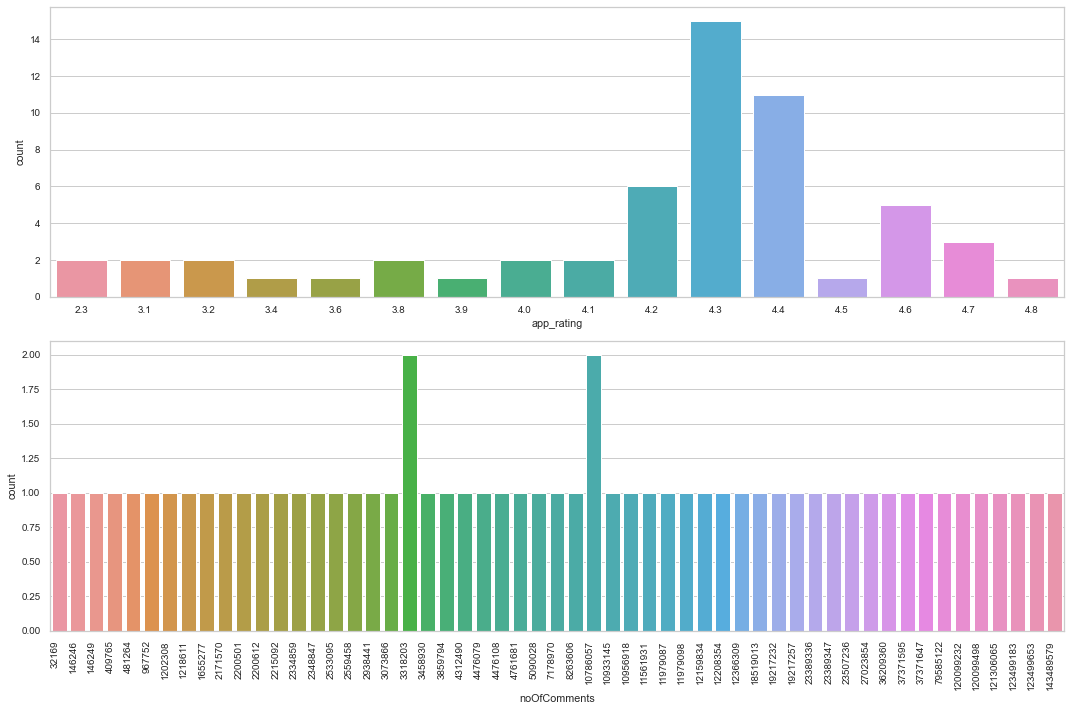

In [40]:
sns.set(rc={'figure.figsize': [15,10]}, font_scale=0.9, style='whitegrid')
plt.subplot(2,1,1)
sns.countplot(df['app_rating'])
plt.subplot(2,1,2)
ax = sns.countplot(df['noOfComments'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()

D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='count'>

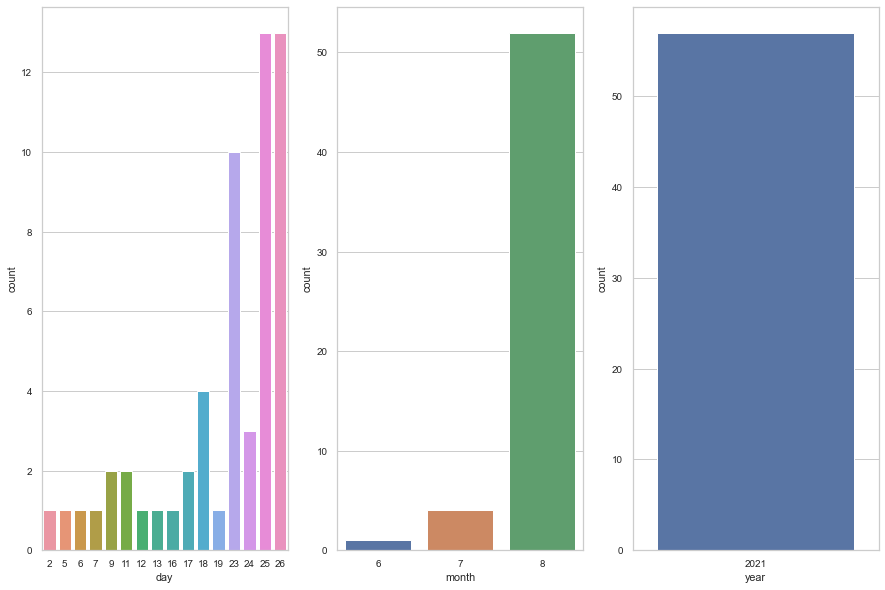

In [34]:
plt.subplot(1,3,1)
sns.countplot(df['day'])
plt.subplot(1,3,2)
sns.countplot(df['month'])
plt.subplot(1,3,3)
sns.countplot(df['year'])

D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Installs (+n)', ylabel='count'>

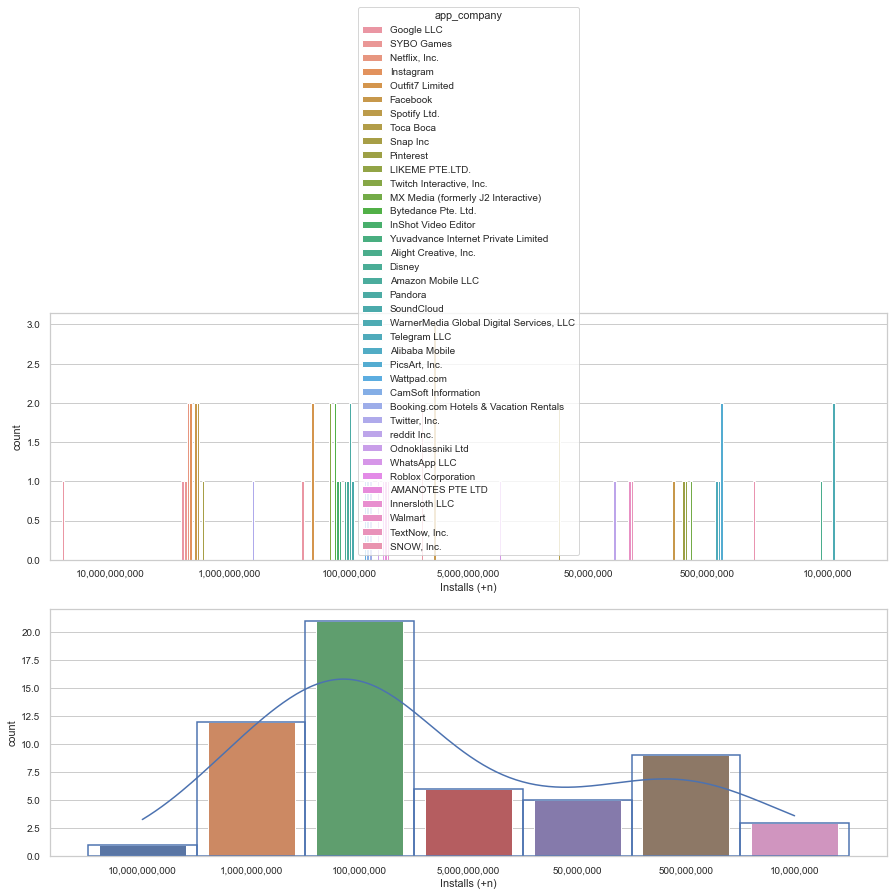

In [49]:
plt.subplot(2,1,1)
sns.countplot(df['Installs (+n)'], hue= df['app_company'])
plt.subplot(2,1,2)
sns.countplot(df['Installs (+n)'])
sns.histplot(df['Installs (+n)'], kde=True, fill=False)

- a.1 There isn't a definite relationship between company and number of installs since the majority of companies are not repetitive infact large companies as google, instagram, facebook, amazon and others are not those of the highest number of installations 

D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Installs (+n)', ylabel='app_company'>

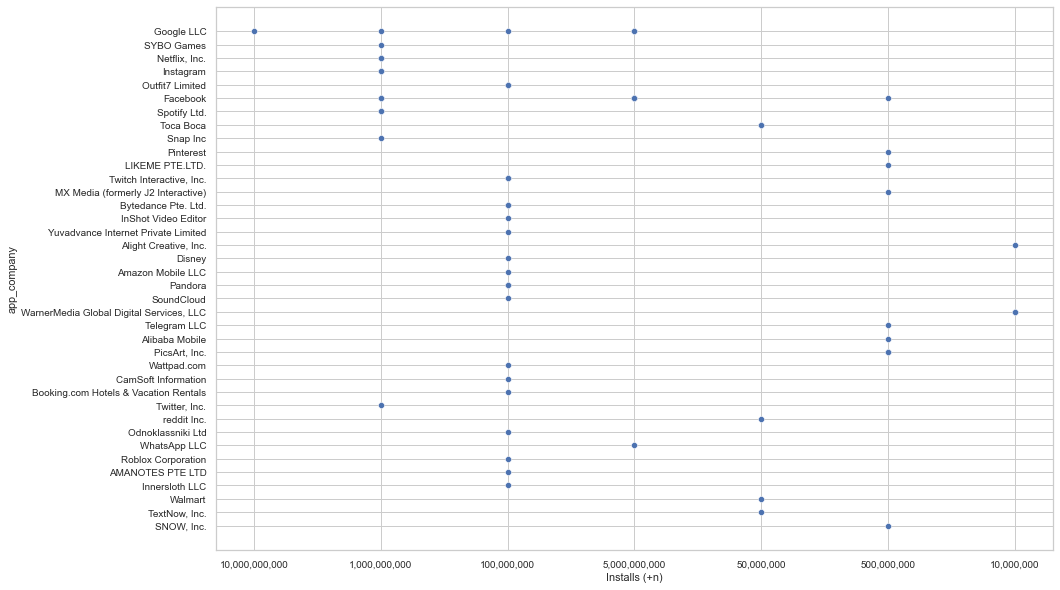

In [70]:
sns.scatterplot(df['Installs (+n)'], df['app_company'])

<AxesSubplot:xlabel='noOfComments', ylabel='app_company'>

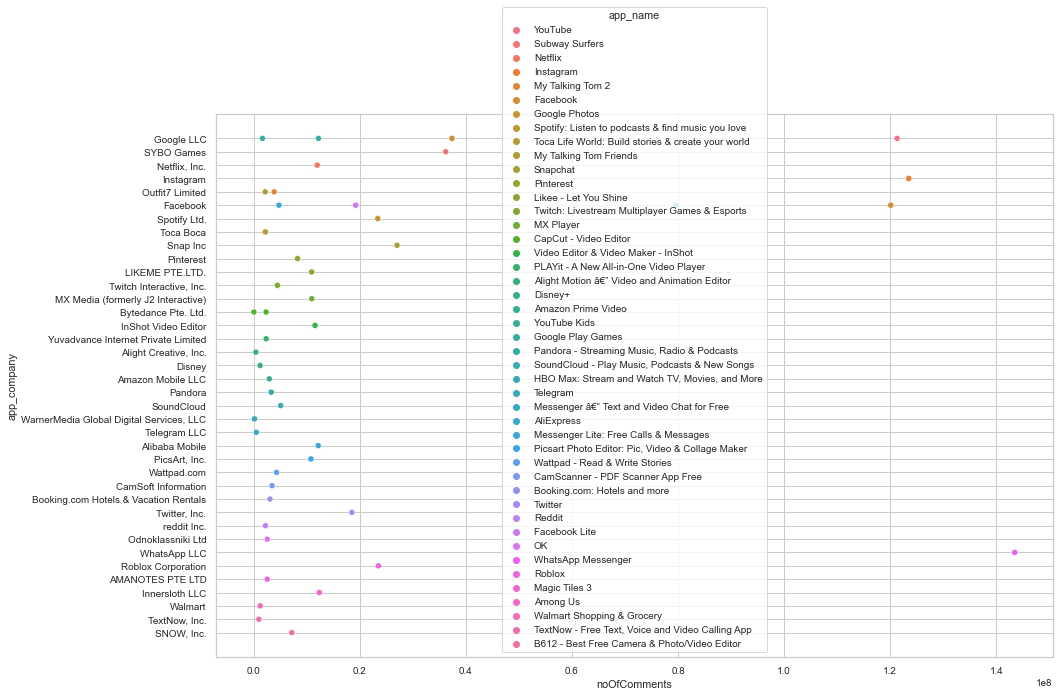

In [77]:
sns.scatterplot(data = df, x='noOfComments', y='app_company', hue='app_name')

**I noticed from the above graph that there is some sort of repetition in the applications it self as facebook is repeated twice, Facebook lite too** this must be corrected

In [99]:
df.describe()

,app_rating,noOfComments,page_index,year,month,day
count,57.000000,5.700000e+01,57.0,57.0,57.000000,57.000000
mean,4.147368,2.273440e+07,1.0,2021.0,7.894737,20.894737
std,0.527496,3.798016e+07,0.0,0.0,0.362738,6.501879
min,2.300000,3.216900e+04,1.0,2021.0,6.000000,2.000000
25%,4.100000,2.348847e+06,1.0,2021.0,8.000000,18.000000
50%,4.300000,7.178970e+06,1.0,2021.0,8.000000,24.000000
75%,4.400000,1.921726e+07,1.0,2021.0,8.000000,25.000000
max,4.800000,1.434896e+08,1.0,2021.0,8.000000,26.000000


In [100]:
names = df['app_name'].unique()
avg_comments = []
avg_rating = []
avg_month = []
avg_day = []
for name in names:
    avg_comments.append(df[df['app_name']==name]['noOfComments'].mean())
    avg_rating.append(df[df['app_name']==name]['noOfComments'].mean())
    avg_month.append(df[df['app_name']==name]['noOfComments'].mean())
    avg_day.append(df[df['app_name']==name]['noOfComments'].mean())

In [85]:
df.head(1)

,app_name,app_company,app_rating,underTitle,gener,noOfComments,page_index,size,android_Version_Supported,InterActive_Elem,content_Rating,Report,year,month,day,Installs (+n),min_in-app_purchases,max_in-app_purchases
0,YouTube,Google LLC,4.3,Recommended for you,Video Players & Editors,121306065,1,Varies with device,Varies with device,"Users Interact, Digital Purchases",TeenLearn more,Flag as inappropriate,2021,8,26,"10,000,000,000",0,0


<AxesSubplot:xlabel='max_in-app_purchases', ylabel='Count'>

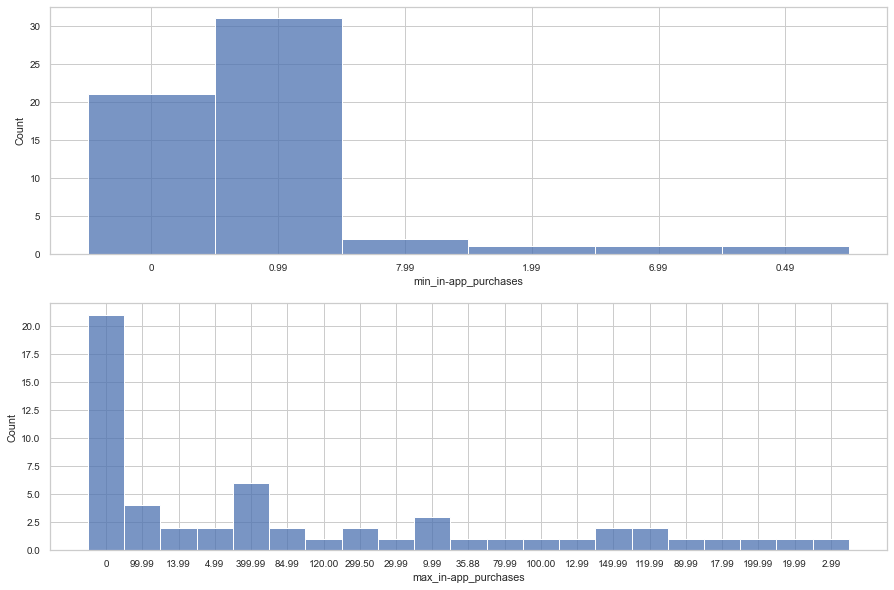

In [63]:
plt.subplot(2,1,1)
sns.histplot(df['min_in-app_purchases'])
plt.subplot(2,1,2)
sns.histplot(df['max_in-app_purchases'])

In [28]:
df['size'].unique()

array(['Varies with device', '174M', '126M', '52M', '133M', '74M', '78M',
       '87M', '57M', '24M', '132M', '101M', '135M', '125M', '103M'],
      dtype=object)

In [36]:
keys = ['Varies with device', '174M', '135M','133M', '132M','126M', '125M','103M','101M', '87M','78M','74M', '57M','52M','24M']
values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
sizes = dict(zip(keys, values))
res = []
for i in df['size']:
    res.append(sizes[i])
df['app_size_cat']=res
df = df.drop('size', axis=1)
df.head()

,app_name,app_company,app_rating,underTitle,gener,noOfComments,page_index,android_Version_Supported,InterActive_Elem,content_Rating,Report,year,month,day,Installs (+n),min_in-app_purchases,max_in-app_purchases,app_size_cat
0,YouTube,Google LLC,4.3,Recommended for you,Video Players & Editors,121306065,1,Varies with device,"Users Interact, Digital Purchases",TeenLearn more,Flag as inappropriate,2021,8,26,"10,000,000,000",0,0,1
1,Subway Surfers,SYBO Games,4.4,Recommended for you,Arcade,36209360,1,4.4 and up,In-Game Purchases,Everyone 10+Fantasy ViolenceLearn more,Flag as inappropriate,2021,8,12,"1,000,000,000",$0.99,$99.99,2
2,Netflix,"Netflix, Inc.",4.3,Recommended for you,Entertainment,11979087,1,Varies with device,NaN,TeenLearn more,Flag as inappropriate,2021,8,26,"1,000,000,000",$7.99,$13.99,1
3,Instagram,Instagram,3.8,Recommended for you,Social,123499183,1,Varies with device,"Users Interact, Shares Info, Shares Location",TeenLearn more,Flag as inappropriate,2021,8,23,"1,000,000,000",$0.99,$4.99,1
4,My Talking Tom 2,Outfit7 Limited,4.3,Recommended for you,Casual,3859794,1,5.0 and up,Digital Purchases,EveryoneComic MischiefLearn more,Flag as inappropriate,2021,8,18,"100,000,000",$0.99,$99.99,6
